## Popular release weekday and popular length of a song

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
%matplotlib inline

In [2]:
df=pd.read_pickle('./dataset_/dataset_cleaned_popularity.pkl')
df.drop(columns=['index', 'level_0'], inplace=True)  # Comes from pickeling the file
df.reset_index(drop=True, inplace=True)

In [102]:
df.tail()

,country,uri,popularity,title,artist,release_type,sub_genre,artist_followers,explicit,album,release_date,track_number,tracks_in_album,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,liveness,valence,tempo,time_signature,genre,days_since_release,released_after_2017,explicit_false,explicit_true,popu_max,top10_dummy,top50_dummy,cluster,duration_min,release_year,release_month,release_day,release_week
166676,Taiwan,https://open.spotify.com/track/6QRRl9Yr0k88RlO...,123.2,不好說,HAOR,single,taiwan pop,2014.0,False,不好說,2018-06-26,1,1,0.751,0.361,10,-8.667,1,0.0531,0.4140,0.000000,0.0894,0.569,92.053,4,pop,872.0,1.0,1,0,112,0.0,0.0,english speaking and nordic,3.310550,2018,6,26,Tuesday
166677,Taiwan,https://open.spotify.com/track/4v29A51TqtD2KFS...,31.2,smalltown,Luke Christopher,single,indie pop rap,152740.0,True,SmallTown,2017-07-07,1,1,0.617,0.598,6,-6.677,1,0.1000,0.1480,0.000000,0.3330,0.526,79.974,4,pop,1226.0,1.0,0,1,162,0.0,0.0,english speaking and nordic,2.347083,2017,7,7,Friday
166678,Taiwan,https://open.spotify.com/track/7InvbALrXpsz58J...,156.0,灰狼,G.E.M.,album,mandopop,1225408.0,False,摩天動物園,2019-12-26,7,13,0.679,0.602,5,-8.849,0,0.1480,0.0952,0.000539,0.0921,0.316,133.951,4,pop,324.0,1.0,1,0,130,0.0,0.0,english speaking and nordic,3.390300,2019,12,26,Thursday
166679,Taiwan,https://open.spotify.com/track/0525Cll5exsrybt...,21.6,清晨巴士,Crowd Lu,album,chinese indie,149875.0,False,有吉他的流行歌曲,2012-11-20,13,13,0.380,0.291,0,-9.088,1,0.0350,0.8390,0.000000,0.0935,0.417,66.537,4,indie,2907.0,0.0,1,0,174,0.0,0.0,english speaking and nordic,4.408000,2012,11,20,Tuesday
166680,Taiwan,https://open.spotify.com/track/6IUFuke9UsBg2FD...,46.4,gettin by,ONE,single,k-rap,205012.0,False,ONE DAY,2017-07-11,1,2,0.743,0.586,0,-3.701,1,0.0558,0.2380,0.000000,0.1960,0.642,92.961,4,rap,1222.0,1.0,1,0,143,0.0,0.0,english speaking and nordic,3.559033,2017,7,11,Tuesday


# Popularity based on release_week, release_day, release_month

In [103]:
# creating a data frame called release_week for the given release_date
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_week'] = df['release_date'].dt.day_name()

The basic idea here is to find out is there is any correlation between the popularity of a song based on the release weekday, release month or release day.
Since there are high chances of sucess if the release event is near the weekend, with this pre assumption we dive into this 
task.

### For Global

In [156]:
# Global popularity of song according to the release_weekday
temp_global = df[df['country']=='Global'].groupby('release_week').mean()
temp_global = temp_global.drop(['artist_followers', 'danceability', 'energy', 'loudness', 
'speechiness', 'acoustics', 'instrumentalness', 'liveness', 'valence', 'tempo',
 'days_since_release', 'explicit_false', 'explicit_true', 'popu_max', 'top10_dummy',
  'top50_dummy', 'duration_min', 'release_year', 'release_month', 'release_day'], axis=1)
temp_global['num'] = [5, 1, 6, 7, 4, 2, 3]
temp_global = temp_global.sort_values(by =  ['num'])
temp_global

,popularity,num
release_week,,
Monday,3234.626546,1
Tuesday,3148.361373,2
Wednesday,4153.607292,3
Thursday,5772.598409,4
Friday,4917.232436,5
Saturday,5662.491667,6
Sunday,3313.337952,7


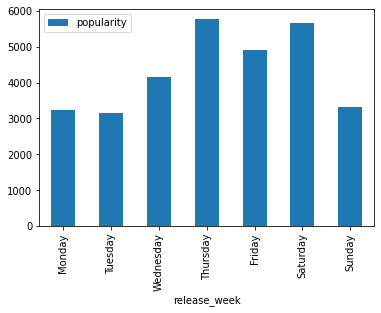

In [157]:
# plot for the popularity vs release_week
temp_global.plot(y='popularity', kind='bar')
plt.show()

So as the first case we took <code>Global</code> and find out that the popularity of the songs which are released on thursday, friday and saturday is more in comparision to the popularity of the songs which are released on the others weekdays. This is what we have assumed and the reason behind this is they choose the friday to release the music especially for the established artist to maximise on a full week sale, and also you will find most of the listeners egarly seeking out new music to stream and add to their playlist. 
Also the streaming and charting on the billbord they track sales from friday to thursday, and by releasing on friday they get much more sale.
Now the trends is shifting a bit they are experimenting a bit with this by releasing the songs on thursday to give it a tepid start although it is a risky stratege but labels are using this to stand out from the friday pack.

### For Germany

In [154]:
# Germany popularity of song according to the release_weekday
temp_germany = df[df['country']=='Germany'].groupby('release_week').mean()
temp_germany = temp_germany.drop(['artist_followers', 'danceability', 'energy', 'loudness', 
'speechiness', 'acoustics', 'instrumentalness', 'liveness', 'valence', 'tempo',
 'days_since_release', 'explicit_false', 'explicit_true', 'popu_max', 'top10_dummy',
  'top50_dummy', 'duration_min', 'release_year', 'release_month', 'release_day'], axis=1)
temp_germany['num'] = [5, 1, 6, 7, 4, 2, 3]
temp_germany = temp_germany.sort_values(by =  ['num'])
temp_germany

,popularity,num
release_week,,
Monday,2972.772143,1
Tuesday,2600.270270,2
Wednesday,3566.551235,3
Thursday,3984.619841,4
Friday,3966.509702,5
Saturday,3835.192208,6
Sunday,2408.732192,7


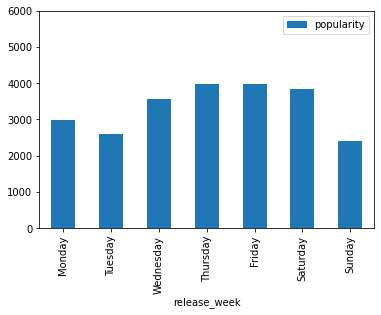

In [162]:
# plot for the popularity vs release_week in Germany
temp_germany.plot(y='popularity', ylim= [0,6000], kind='bar')
plt.show()

### For USA

In [152]:
# USA popularity of song according to the release_weekday
temp_usa = df[df['country']=='USA'].groupby('release_week').mean()
temp_usa = temp_usa.drop(['artist_followers', 'danceability', 'energy', 'loudness', 
'speechiness', 'acoustics', 'instrumentalness', 'liveness', 'valence', 'tempo',
 'days_since_release', 'explicit_false', 'explicit_true', 'popu_max', 'top10_dummy',
  'top50_dummy', 'duration_min', 'release_year', 'release_month', 'release_day'], axis=1)
temp_usa['num'] = [5, 1, 6, 7, 4, 2, 3]
temp_usa = temp_usa.sort_values(by =  ['num'])
temp_usa

,popularity,num
release_week,,
Monday,2929.887603,1
Tuesday,2828.824534,2
Wednesday,3587.547989,3
Thursday,4437.138056,4
Friday,4047.746297,5
Saturday,5761.883178,6
Sunday,2812.943085,7


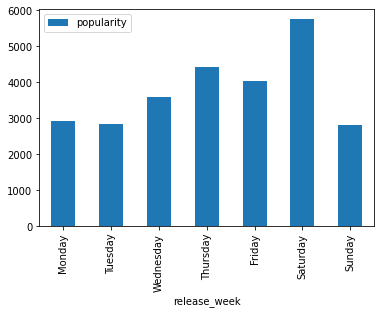

In [151]:
# plot for the popularity vs release_week in USA
temp_usa.plot(y='popularity', kind='bar')
plt.show()

# By Dates

In [11]:
# Global popularity of song according to the release_day
day_global = df[df['country']=='Global'].groupby('release_day').mean()
day_global = day_global.drop(['artist_followers', 'danceability', 'energy', 'loudness', 
'speechiness', 'acoustics', 'instrumentalness', 'liveness', 'valence', 'tempo',
 'days_since_release', 'explicit_false', 'explicit_true', 'popu_max', 'top10_dummy',
  'top50_dummy', 'duration_min', 'release_year', 'release_month'], axis=1)
day_global

,popularity
release_day,
1,2802.522049
2,4319.642857
3,7407.647135
4,5035.273016
5,4321.535088
6,5027.366071
7,4993.184028
8,4856.602381
9,4485.868605


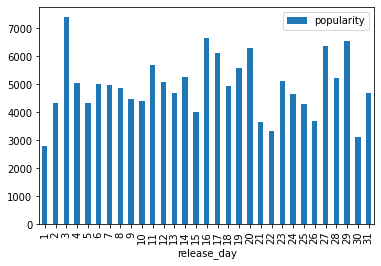

In [12]:
# plot for the popularity vs release_day in Global
day_global.plot(kind='bar')
plt.show()

In [13]:
# Global popularity of song according to the release_month in Global
month_global = df[df['country']=='Global'].groupby('release_month').mean()
month_global = month_global.drop(['artist_followers', 'danceability', 'energy', 'loudness', 
'speechiness', 'acoustics', 'instrumentalness', 'liveness', 'valence', 'tempo',
 'days_since_release', 'explicit_false', 'explicit_true', 'popu_max', 'top10_dummy',
  'top50_dummy', 'duration_min', 'release_year', 'release_day'], axis=1)
month_global

,popularity
release_month,
1,3782.625926
2,4667.523229
3,5938.552464
4,6201.253293
5,3960.527280
6,6223.131818
7,4332.623775
8,4843.201751
9,3754.591548


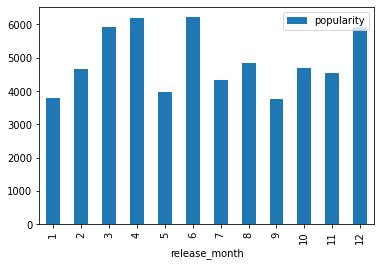

In [14]:
# plot for the popularity vs release_month in Global
month_global.plot(kind='bar')
plt.show()

# Most popular songs length

Here in this section we tried to look on the most ideal length of the song, because it is an intresting finding to see that does the lenght of the songs has an impact on the popularity of the songs.

In order to gain insites on this first we tried to see the trends on the global set and as in the plot we can see that there is a lot going on between 2 minutes to 5.5 minutes, which clearly indicate that most of the songs length lies between this interval.
After this when we look into the average length of songs in this global set we got an avergae of 3.43 minutes and with this we took only the average of those songs whose popularity is greater than 500000 then we got an average of 3.46 minutes, which is similar to the mean of all songs.

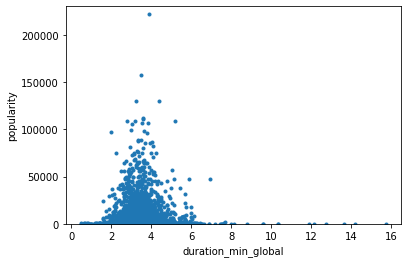

In [318]:
# most popular songs length globally
global_len = df[df['country']=='Global']
x = global_len['duration_min']
y = global_len['popularity']
plt.xlabel('duration_min_global')
plt.ylabel('popularity')
plt.ylim(0, 230000)
plt.plot(x, y, ".")

In [28]:
global_len.head()

,country,uri,popularity,title,artist,release_type,sub_genre,artist_followers,explicit,album,release_date,track_number,tracks_in_album,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,liveness,valence,tempo,time_signature,genre,days_since_release,released_after_2017,explicit_false,explicit_true,popu_max,top10_dummy,top50_dummy,cluster,duration_min,release_year,release_month,release_day,release_week
0,Global,https://open.spotify.com/track/6FyRXC8tJUh863J...,31833.95,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.470,1,0.3360,0.323000,0.000000,0.0676,0.720,171.993,4,hip hop,740.0,1.0,1,0,10,1.0,1.0,global,4.310650,2018,11,5,Monday
16,Global,https://open.spotify.com/track/5xhJmd0I15jFcEd...,418.00,it wont kill ya,The Chainsmokers - Louane,album,dance pop,16931568.0,False,Memories...Do Not Open,2017-04-07,7,12,0.572,0.530,6,-8.521,0,0.0654,0.064700,0.000169,0.1270,0.120,170.138,4,pop,1314.0,1.0,1,0,72,0.0,0.0,global,3.626883,2017,4,7,Friday
39,Global,https://open.spotify.com/track/0wJJhRgdHhT93Z3...,56.00,hymn,Kesha,single,dance pop,5910376.0,True,Hymn,2017-08-03,1,1,0.488,0.538,6,-4.974,1,0.0760,0.147000,0.000000,0.3050,0.380,67.037,4,pop,1199.0,1.0,0,1,131,0.0,0.0,global,3.426667,2017,8,3,Thursday
58,Global,https://open.spotify.com/track/6JSryEdVJTZq6YB...,78.40,arrows,Foo Fighters,album,alternative metal,8092392.0,False,Concrete and Gold,2017-09-15,7,11,0.515,0.917,1,-7.312,1,0.0417,0.000209,0.000476,0.1450,0.409,121.988,4,metal,1156.0,1.0,1,0,103,0.0,0.0,global,4.436450,2017,9,15,Friday
80,Global,https://open.spotify.com/track/7nAfXgeHfDO50up...,244.95,talking to myself,Linkin Park,album,alternative metal,17132813.0,False,One More Light,2017-05-19,3,10,0.593,0.712,2,-6.325,0,0.0286,0.001840,0.000000,0.1280,0.473,124.013,4,metal,1272.0,1.0,1,0,86,0.0,0.0,global,3.855117,2017,5,19,Friday


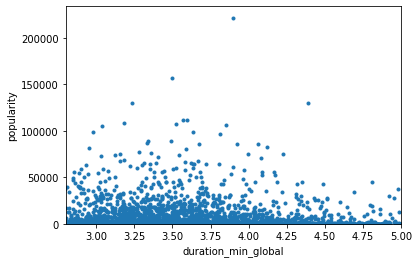

In [126]:
# closer look on the above graph
plt.xlabel('duration_min_global')
plt.ylabel('popularity')
plt.axis([2.8, 5, 0, 233767])
plt.plot(x, y, '.')

In [41]:
pup_len = df.loc[df['popularity'].between(200000, 270000, inclusive=False), 'duration_min']
pup_len

30282     3.524450
30287     3.524450
30291     3.524450
52220     3.895217
52226     3.895217
52232     3.895217
52249     3.895217
52252     3.895217
148758    4.788450
154734    4.462650
154854    5.313567
Name: duration_min, dtype: float64

In [61]:
countries = df.loc[df['country'] == 'Global', 'duration_min']
countries

0        4.310650
16       3.626883
39       3.426667
58       4.436450
80       3.855117
           ...   
83257    3.352033
83289    2.733333
83302    2.432867
83308    2.872083
83343    2.732883
Name: duration_min, Length: 5423, dtype: float64

### Globally

In [22]:
# Average duration of songs globally
duration_global = df[df['country']=='Global']
duration_global['duration_min'].mean()


3.430771196754564

In [63]:
# Average duration of most popular songs globally
pup_len_global = duration_global.loc[duration_global['popularity'].between(50000, 221571, inclusive=False), 'duration_min']
pup_len_global.mean()


3.460671317829457

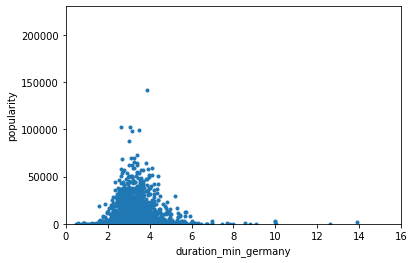

In [319]:
# popular songs lenght in Germany
germany_len = df[df['country']=='Germany']
x = germany_len['duration_min']
y = germany_len['popularity']
plt.xlabel('duration_min_germany')
plt.ylabel('popularity')
plt.ylim(0, 230000)
plt.xlim(0.0, 16)
# plt.axis([2.8, 5, 0, 233767])
plt.plot(x, y, '.')

### Germany

In [67]:
# Average duration of songs germany
duration_germany = df[df['country']=='Germany']
duration_germany['duration_min'].mean()

3.250695527438576

In [68]:
# Average duration of most popular songs globally
pup_len_germany = duration_germany.loc[duration_germany['popularity'].between(50000, 221571, inclusive=False), 'duration_min']
pup_len_germany.mean()

3.2899098290598294

### USA

Similarly when we tried to see this with the specific countries like with Gernamy the average duration of songs is 3.25 minutes and for USA it is 3.41 minutes. This boils down to a fact that moreover the popular length is between 2.5 minutes to 4.5 minutes.

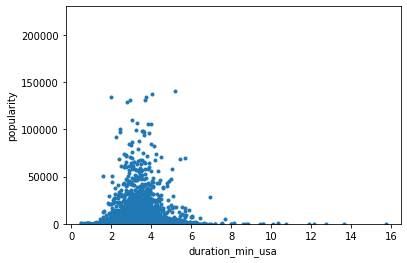

In [320]:
# popular songs lenght in USA
usa_len = df[df['country']=='USA']
x = usa_len['duration_min']
y = usa_len['popularity']
plt.xlabel('duration_min_usa')
plt.ylabel('popularity')
# plt.axis([2.8, 5, 0, 233767])
plt.ylim(0, 230000)
plt.plot(x, y, '.')

In [69]:
# Average duration of songs USA
duration_usa = df[df['country']=='USA']
duration_usa['duration_min'].mean()

3.414180285107674

In [85]:
# Average duration of most popular songs USA
pup_len_usa = duration_usa.loc[duration_usa['popularity'].between(50000, 221571, inclusive=False), 'duration_min']
pup_len_usa.mean()


3.3642500000000006

### For all the countries

In [124]:
# list of all the countries in the dataset
lst_countries = df['country'].unique()
lst_countries

array(['Global', 'USA', 'Argentina', 'Belgium', 'Switzerland', 'Chile',
       'Colombia', 'Costa Rica', 'Germany', 'Ecuador', 'Spain', 'Italy',
       'Mexico', 'Peru', 'Portugal', 'Taiwan', 'UK', 'Austria',
       'Australia', 'Canada', 'Finland', 'France', 'Indonesia', 'Ireland',
       'Malaysia', 'Netherlands', 'Norway', 'New Zealand', 'Philippines',
       'Poland', 'Sweden', 'Singapore', 'Turkey', 'Brazil', 'Denmark'],
      dtype=object)

In [88]:
# average length of the songs in all the given countries
lst_duration = []
for i in lst_countries:
    duration_song = df[df['country'] == i]
    lst_duration.append(duration_song['duration_min'].mean())

lst_duration   

[3.430771196754564,
 3.414180285107674,
 3.540530278435351,
 3.4169272157590065,
 3.311725923958748,
 3.6059855867720225,
 3.613031191983122,
 3.642379951030634,
 3.250695527438576,
 3.576661076962479,
 3.433146347846776,
 3.3176123877858585,
 3.548596420461336,
 3.6688706291293696,
 3.506667397887584,
 3.7426591073555007,
 3.5228532061186653,
 3.3084514635316697,
 3.5092705970522107,
 3.4197385072931614,
 3.448861772322354,
 3.3816855100970367,
 3.6369982346305703,
 3.5689573104919674,
 3.5013049324618737,
 3.2196223389142564,
 3.3619432385057473,
 3.492987455499344,
 3.6025320657447844,
 3.491656555426955,
 3.3653354399285393,
 3.5051485119880588,
 3.6193087749024437,
 3.340068350220039,
 3.2989544302957956]

In [217]:
# popular length of songs of each countries (on the basis of popularity index given in the code)
lst_popu_duration = []
for i in lst_countries:
    dur_song = df[df['country'] == i]
    lst_popu_duration.append(dur_song.loc[dur_song['popularity'].between(50000, 221571, inclusive = False), 'duration_min'].mean())

lst_popu_duration    
 

[3.460671317829457,
 3.3642500000000006,
 3.7531444927536226,
 3.3606077777777776,
 3.3620977477477485,
 3.865170355191257,
 3.7265393719806763,
 3.8190963235294118,
 3.2899098290598294,
 3.7356187499999995,
 3.6846848101265826,
 3.353044358974359,
 3.7316594696969703,
 3.805432014388489,
 3.53278918128655,
 4.016456166666666,
 3.4372826754385963,
 3.2749979591836738,
 3.433923784722222,
 3.397218131868132,
 3.4466129629629627,
 3.3943775641025646,
 3.782134474885844,
 3.396529356060606,
 3.5069809748427665,
 3.328041830065359,
 3.290854273504273,
 3.48804841954023,
 4.027972572178478,
 3.575385317460318,
 3.428773333333333,
 3.654805172413793,
 3.7232423547400613,
 3.137263774104683,
 3.248086021505376]

In our dataset we have total 35 countries inclusive of global, and in the below table you can see the average duration of songs for each countries, which basically gives us an average of 3.47 minutes.

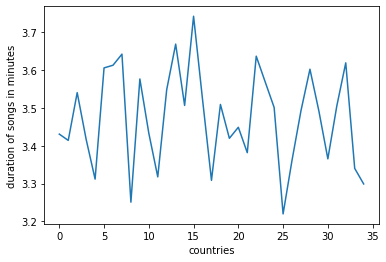

In [97]:
# plot for the lenght of the songs in different countries
plt.xlabel('countries')
plt.ylabel('duration of songs in minutes')
plt.plot(lst_duration)
plt.show()

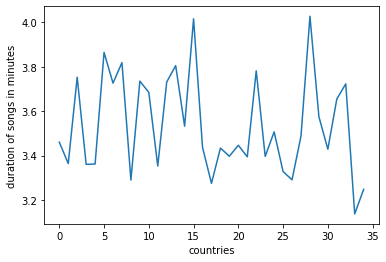

In [308]:
# plot for the lenght of the songs in different countries according to popularity
plt.xlabel('countries') 
plt.ylabel('duration of songs in minutes')
plt.plot(lst_popu_duration)
plt.show()

In [203]:
duration_countries = pd.DataFrame(lst_countries)
duration_countries

,0
0,Global
1,USA
2,Argentina
3,Belgium
4,Switzerland
5,Chile
6,Colombia
7,Costa Rica
8,Germany
9,Ecuador


In [205]:
lst_popu_duration

,0
0,3.460671
1,3.364250
2,3.753144
3,3.360608
4,3.362098
5,3.865170
6,3.726539
7,3.819096
8,3.289910
9,3.735619


In [257]:
lst_popu_duration = pd.DataFrame(lst_popu_duration)
type(lst_popu_duration)

pandas.core.frame.DataFrame

In [291]:

bar_plot = pd.concat([duration_countries, lst_popu_duration], axis=1)
# bar_plot.rename(columns={0:"oll", "oll":"New"} ,inplace=True)
# bar_plot.rename(columns={ bar_plot.columns[1]: "newe" })
bar_plot.columns=['Countries', 'duration of songs in minutes']
bar_plot

,Countries,duration of songs in minutes
0,Global,3.460671
1,USA,3.364250
2,Argentina,3.753144
3,Belgium,3.360608
4,Switzerland,3.362098
5,Chile,3.865170
6,Colombia,3.726539
7,Costa Rica,3.819096
8,Germany,3.289910
9,Ecuador,3.735619


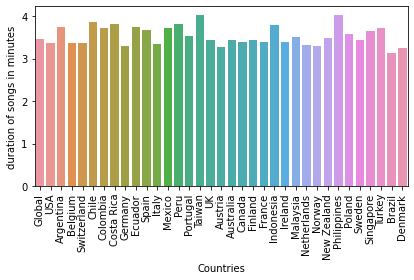

In [312]:
ax = sns.barplot(x='Countries', y='duration of songs in minutes', data = bar_plot, capsize=.2, estimator=np.mean)
plt.xticks(rotation=90)
plt.tight_layout()

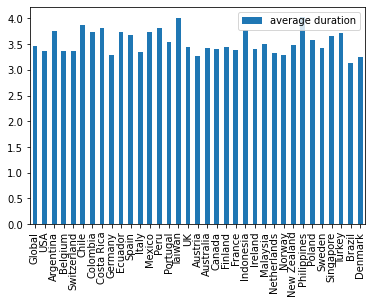

In [244]:
pp = pd.DataFrame({'average duration':lst_popu_duration} ,index=lst_countries)
ax = pp.plot.bar()

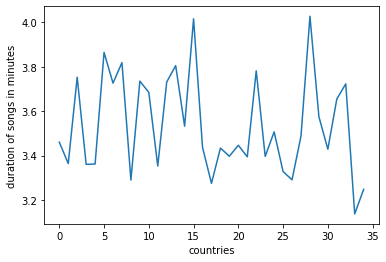

In [175]:
# plot for the popular length of songs in different countries
plt.xlabel('countries')
plt.ylabel('duration of songs in minutes')
plt.plot(lst_popu_duration)
plt.show()

In [99]:
avg_all_countries = sum(lst_duration) / len(lst_duration)
avg_all_countries

3.47474626343126

In [100]:
popu_avg_all_countries = sum(lst_popu_duration) / len(lst_popu_duration)
popu_avg_all_countries

3.5381057977120767

As we can see from the above picture that the ideal songs length is equivelent to the length of the popular songs which concludes the basic thing is that the length of the songs should be between 2 to 4.5 minutes so with this we can say that it is not common for the artist as well as the listners to make and listen the lengthy songs. 

It is also because of the span of the listner and if an artist make songs long then the listner will not give attention to the song as much as he is giving to the shorter songs.
Also it is a general convention especially in pop genere and related genere like rock or jazz that the songs length should be atmost 4 minute.

Also from the point of the streaming platform and radios it is quite convienient to play short songs because they get to play more advertisement let's say in one hour span.